# 数据可视化作业题目(基于`seaborn`)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
%matplotlib inline
# %config InlineBackend.figure_format= "svg"
# plt.rcParams["xtick.direction"]="in"
# plt.rcParams["ytick.direction"]="in"

# ignore the SSL verification 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 练习1：航班乘客变化分析 (2个题)

In [4]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### 分析年度乘客总量的变化情况（提示：折线图）+ 乘客量在一年中12个月份的分布（提示：柱状图）

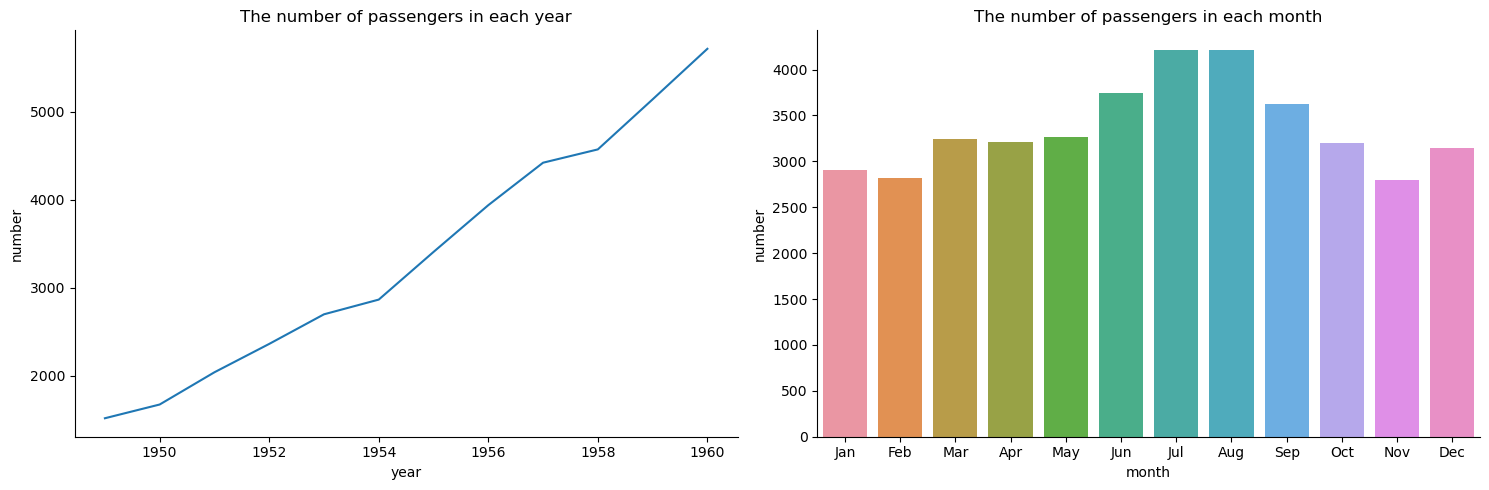

In [8]:
fig, axes = sns.mpl.pyplot.subplots(1, 2, figsize=(15, 5))

ax = axes[0]
passengers_pyr = data.groupby("year")["passengers"].sum()
sns.lineplot(x=passengers_pyr.index, y=passengers_pyr.values, ax=ax)
ax.set_title("The number of passengers in each year")
ax.set_xlabel("year")
ax.set_ylabel("number")

ax = axes[1]
passengers_pmon = data.groupby("month")["passengers"].sum()
sns.barplot(x=passengers_pmon.index, y=passengers_pmon.values, ax=ax)
ax.set_title("The number of passengers in each month")
ax.set_xlabel("month")
ax.set_ylabel("number")

sns.despine()
fig.tight_layout()
sns.mpl.pyplot.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

In [65]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

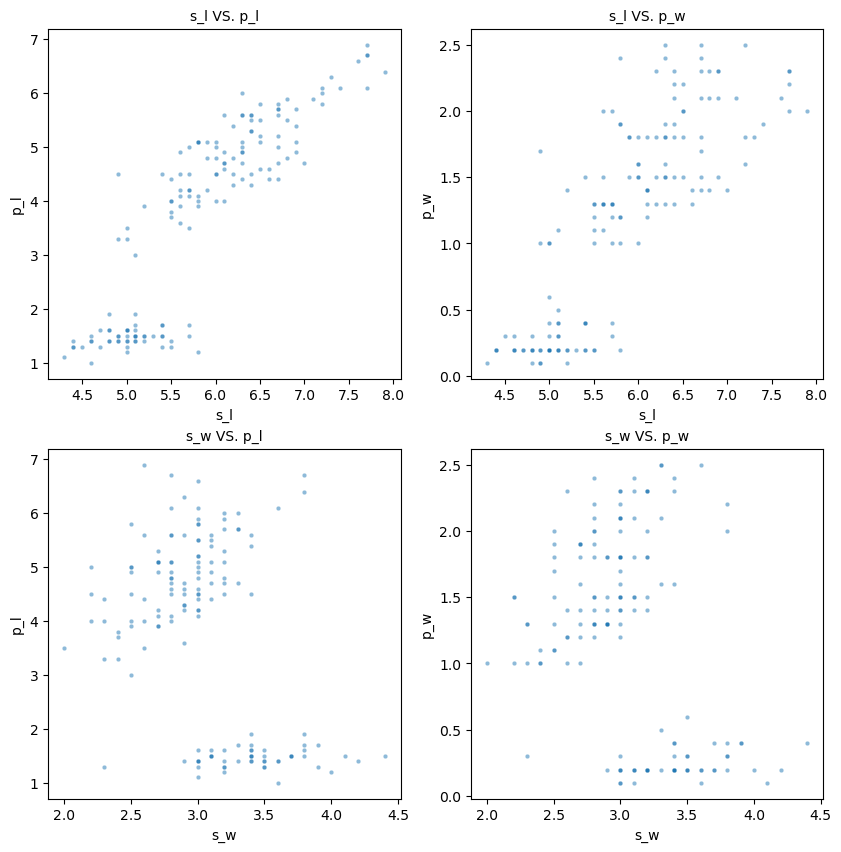

In [66]:
fig, axes = sns.mpl.pyplot.subplots(2, 2, figsize=(10, 10))

labels_dict = {"s_l": "sepal_length", "s_w": "sepal_width", "p_l": "petal_length", "p_w": "petal_width"}
xlabels = ["s_l", "s_w"]
ylabels = ["p_l", "p_w"]

for i in range(2):
    xlabel = xlabels[i]
    for j in range(2):
        ylabel = ylabels[j]
        ax = axes[i,j]
        sns.scatterplot(x=data[labels_dict[xlabel]], y=data[labels_dict[ylabel]], ax=ax, s=10, alpha=0.5)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)

plt.show()

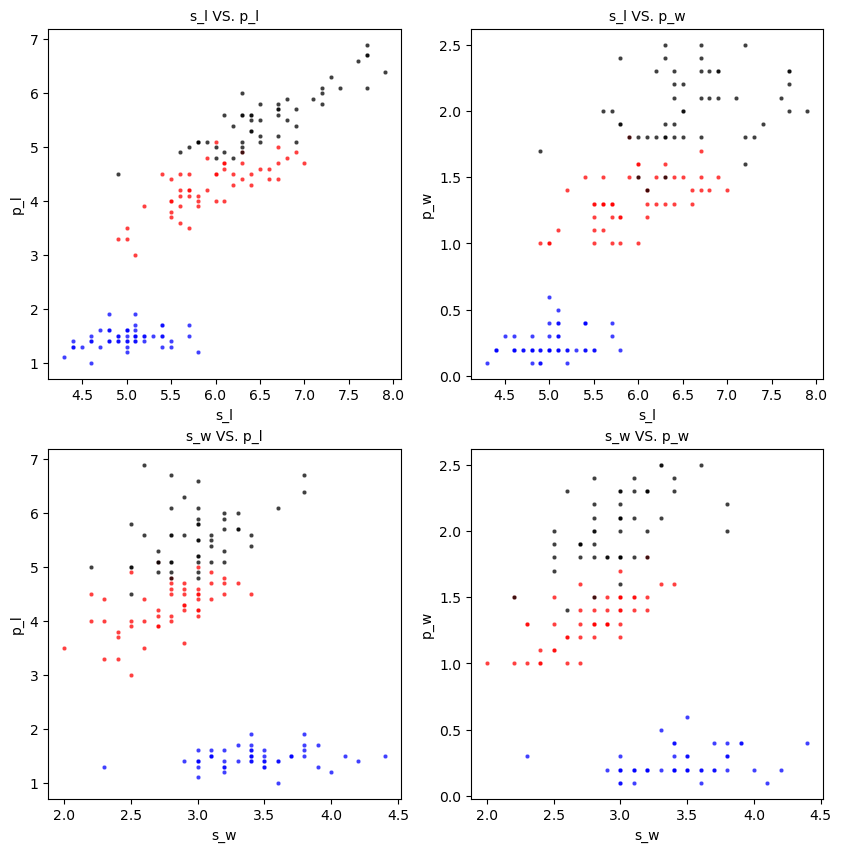

In [67]:
fig, axes=sns.mpl.pyplot.subplots(2, 2, figsize=(10, 10))
labels_dict={"s_l":"sepal_length", "s_w":"sepal_width", "p_l":"petal_length", "p_w":"petal_width"}
xlabels=["s_l", "s_w"]
ylabels=["p_l", "p_w"]
colors=["blue", "r", "black"]

for ns, spec in enumerate(data["species"].unique()):
    sl= data["species"]==spec
    for i in range(2):
        xlabel=xlabels[i]
        for j in range(2):
            ylabel=ylabels[j]
            ax=axes[i,j]
            sns.scatterplot(x=data[labels_dict[xlabel]][sl], y=data[labels_dict[ylabel]][sl], ax=ax, s=10, alpha=0.75, color=colors[ns])            
            ax.set_xlabel(xlabel, fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)
            ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)


#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

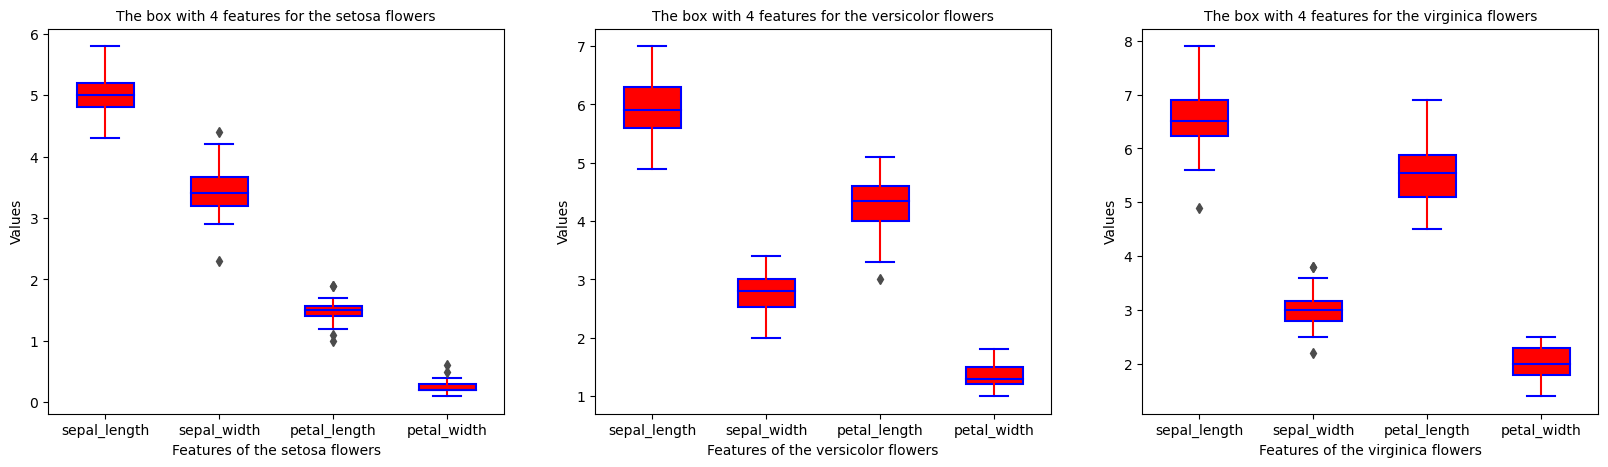

In [69]:
fig, axes=sns.mpl.pyplot.subplots(1, 3, figsize=(20, 5))
species=data["species"].unique().tolist()
features=data.columns.tolist()[:-1]

for ns, spec in enumerate(species):
    sl = data["species"] == spec
    ax = axes[ns]
    sns.boxplot(data=data[sl][features], ax=ax, palette=["red"], width=0.5,
                boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'})
    ax.set_xlabel(f"Features of the {spec} flowers", fontsize=10)
    ax.set_ylabel("Values", fontsize=10)
    ax.set_title(f"The box with 4 features for the {spec} flowers", fontsize=10)

#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

## 练习3：餐厅小费情况分析 (7个题)

In [71]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

Text(0.5, 1.0, 'total_bill vs. tip')

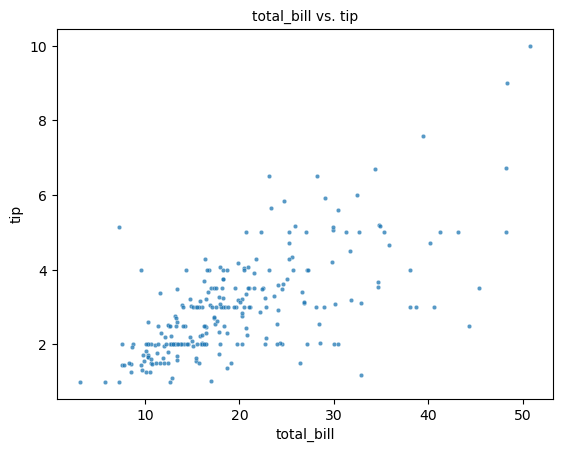

In [72]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel = "total_bill"
ylabel = "tip"
sns.scatterplot(x=data[xlabel], y=data[ylabel], s=10, alpha=0.75, ax=ax)
ax.set_xlabel(xlabel, fontsize=10)
ax.set_ylabel(ylabel, fontsize=10)
ax.set_title(f"{xlabel} vs. {ylabel}", fontsize=10)

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

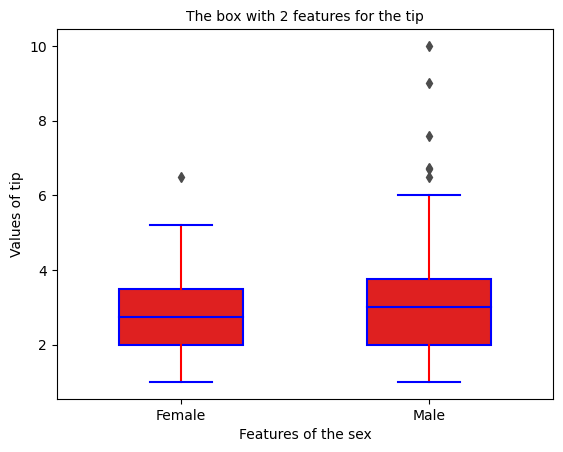

In [73]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel="sex"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(data=[data[ylabel][data[xlabel]==feature] for feature in features], ax=ax, palette=["red"], width=0.5, boxprops={'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'})
ax.set_xticklabels(features)
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

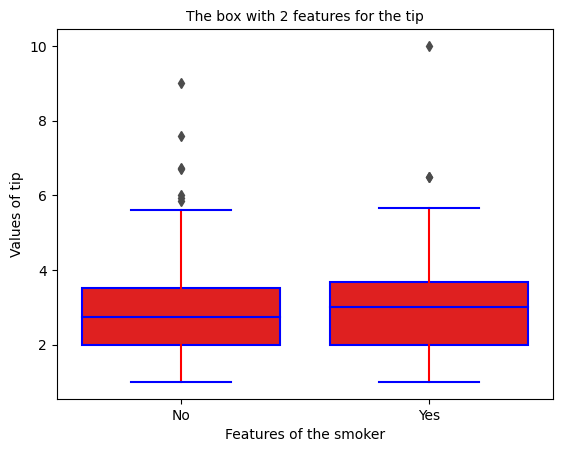

In [79]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel="smoker"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(data=[data[ylabel][data[xlabel]==feature] for feature in features],
               palette=["red"],
               boxprops={'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xticklabels(features)
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 4 features for the tip')

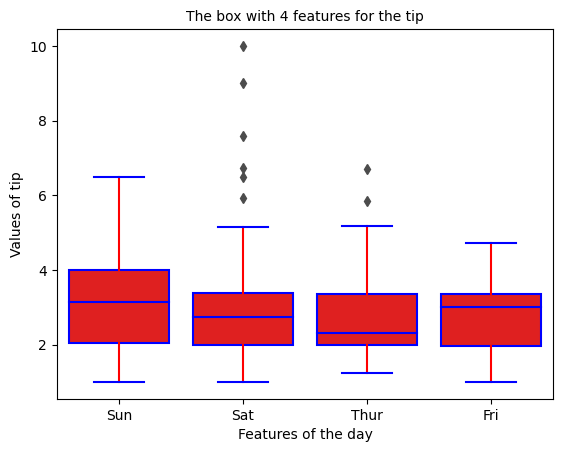

In [80]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel="day"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(data=[data[ylabel][data[xlabel]==feature] for feature in features],
               palette=["red"],
               boxprops={'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xticklabels(features)
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

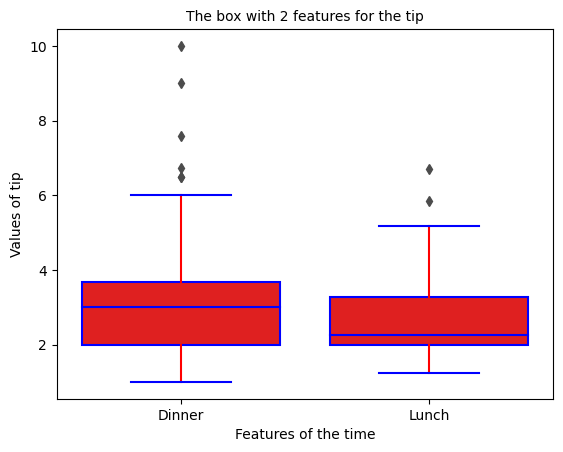

In [81]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel="time"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(data=[data[ylabel][data[xlabel]==feature] for feature in features],
               palette=["red"],
               boxprops={'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xticklabels(features)
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 6 features for the tip')

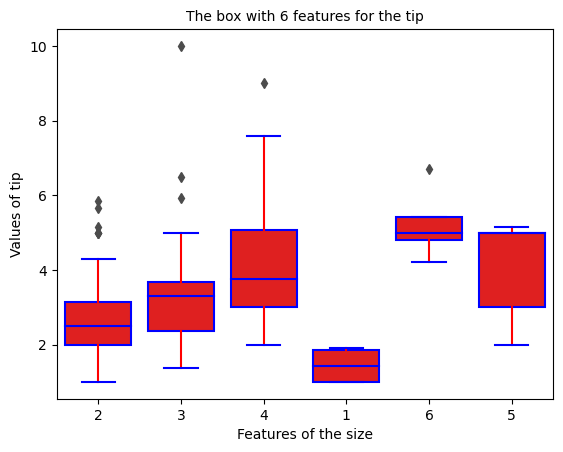

In [82]:
fig, ax=sns.mpl.pyplot.subplots()
xlabel="size"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(data=[data[ylabel][data[xlabel]==feature] for feature in features],
               palette=["red"],
               boxprops={'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'}
               )
ax.set_xticklabels(features)
ax.set_xlabel(f"Features of the {xlabel}", fontsize=10)
ax.set_ylabel(f"Values of {ylabel}", fontsize=10)
ax.set_title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


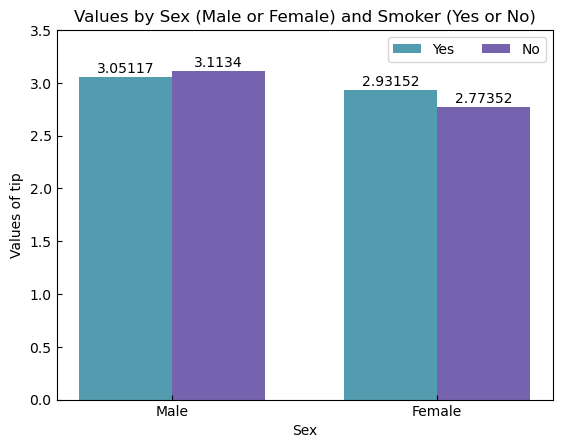

In [231]:
tips=data.groupby(["sex", "smoker"])["tip"].mean().unstack()
print(tips)

xlabels1=tips.index.tolist()
xlabels2=tips.columns.tolist()

fig, ax=sns.mpl.pyplot.subplots()
width=0.35
colors=['#539caf', '#7663b0']
x=np.arange(len(xlabels1))
for n, label in enumerate(xlabels2):
    offset = width * n
    rects=ax.bar(x + offset, tips.loc[:,label], width, label=label, color=colors[n])
    ax.bar_label(rects, padding=1)


ax.set_ylabel("Values of tip")
ax.set_title("Values by Sex (Male or Female) and Smoker (Yes or No)")
ax.set_xticks(x + width/2, xlabels1)
ax.set_ylim(0, 3.5)
ax.legend(ncols=2)

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

In [232]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


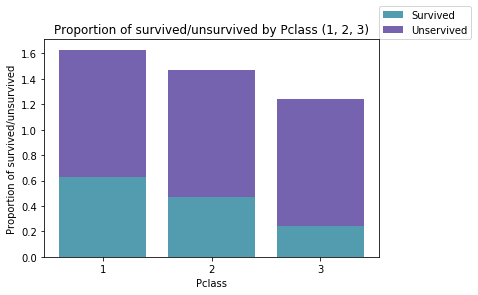

#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


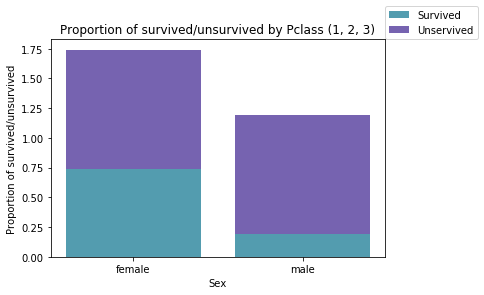

#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

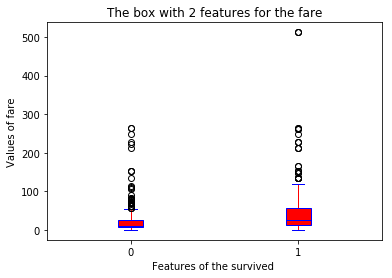

#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

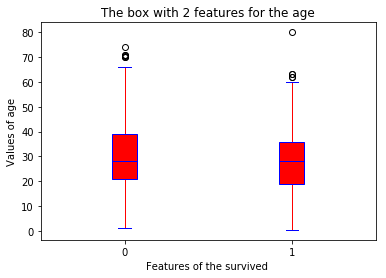

#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


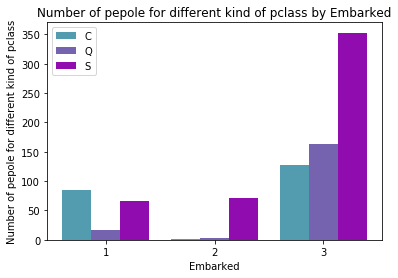

#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

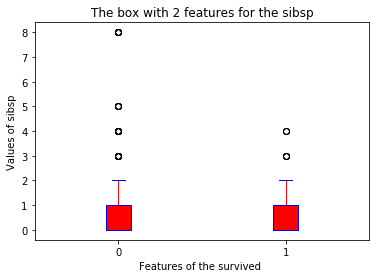

#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

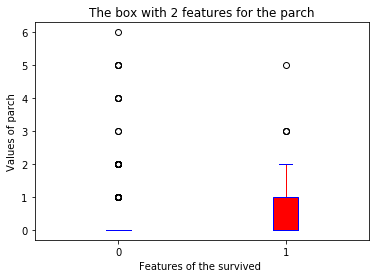

#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

survived    0    1
alone             
False     175  179
True      374  163


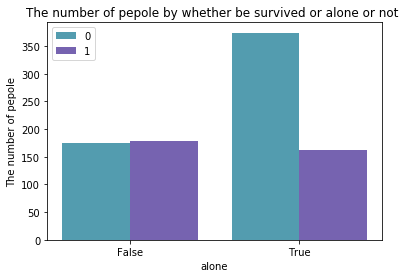